## Veriye ilk bakış

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import date, timedelta


warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("~/Desktop/DataThon_Yarisma/train.csv", parse_dates= ["tarih"])
test = pd.read_csv("~/Desktop/DataThon_Yarisma/testFeatures.csv", parse_dates=['tarih'])
train.head()

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A
1,2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A
2,2016-01-01,hindi,160,et,11.12,Yurt içi,M,A
3,2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A
4,2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A


In [3]:
train_copy = train.copy()
train_copy.head()

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A
1,2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A
2,2016-01-01,hindi,160,et,11.12,Yurt içi,M,A
3,2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A
4,2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A


In [4]:
testkopya = test.copy()
testkopya.head()

,id,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir
0,0,2021-01-01,kıyma,120,et,Yurt içi,M,A
1,1,2021-01-01,tavuk,103,et,Yurt içi,M,A
2,2,2021-01-01,hindi,160,et,Yurt içi,M,A
3,3,2021-01-01,Bakla-kuru,354,sebze ve bakliyat,Yurt içi,M,A
4,4,2021-01-01,Bakla-taze,72,sebze ve bakliyat,Yurt içi,M,A


In [5]:
## Veri seti yapısal bilgileri

In [6]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227520 entries, 0 to 227519
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   tarih              227520 non-null  datetime64[ns]
 1   ürün               227520 non-null  object        
 2   ürün besin değeri  227520 non-null  int64         
 3   ürün kategorisi    227520 non-null  object        
 4   ürün fiyatı        227520 non-null  float64       
 5   ürün üretim yeri   227520 non-null  object        
 6   market             227520 non-null  object        
 7   şehir              227520 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 13.9+ MB


In [7]:
train_copy.dtypes ## degiskenlerin tiplerine bakildi

tarih                datetime64[ns]
ürün                         object
ürün besin değeri             int64
ürün kategorisi              object
ürün fiyatı                 float64
ürün üretim yeri             object
market                       object
şehir                        object
dtype: object

## Veri setinin betimlenmesi

In [8]:
train_copy.shape

(227520, 8)

In [9]:
train_copy.columns

Index(['tarih', 'ürün', 'ürün besin değeri', 'ürün kategorisi', 'ürün fiyatı',
       'ürün üretim yeri', 'market', 'şehir'],
      dtype='object')

In [10]:
train_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
ürün besin değeri,227520.0,143.113924,133.218871,8.00,41.00,83.0,250.0,402.00
ürün fiyatı,227520.0,16.348622,13.260935,0.73,7.33,12.6,20.9,141.33


## Eksik degerlerin İncelenmesi

In [11]:
train_copy.isnull().values.any()

False

In [12]:
train_copy.isnull().sum()

tarih                0
ürün                 0
ürün besin değeri    0
ürün kategorisi      0
ürün fiyatı          0
ürün üretim yeri     0
market               0
şehir                0
dtype: int64

In [13]:
## eksik deger olsaydı fillna ile doldurabilirsin

## Kategorik degisken ozeti

In [14]:
train_kategorik = train_copy.select_dtypes(include= ["object"])
train_kategorik.head()

,ürün,ürün kategorisi,ürün üretim yeri,market,şehir
0,kıyma,et,Yurt içi,M,A
1,tavuk,et,Yurt içi,M,A
2,hindi,et,Yurt içi,M,A
3,Bakla-kuru,sebze ve bakliyat,Yurt içi,M,A
4,Bakla-taze,sebze ve bakliyat,Yurt içi,M,A


### Kategorik degiskenin sınıflarına ve sınıf sayısına erismek

In [15]:
def sinifSayisi(col):
    adet = train_copy[col].value_counts().count()
    print("{} tane {} vardir.".format(adet, col))

In [16]:
columns = ["ürün", "ürün kategorisi", "ürün üretim yeri", "market", "şehir"]
for i in np.arange(5):
    sinifSayisi(columns[i])

79 tane ürün vardir.
6 tane ürün kategorisi vardir.
2 tane ürün üretim yeri vardir.
3 tane market vardir.
8 tane şehir vardir.


In [17]:
train_copy["ürün kategorisi"].value_counts()

sebze ve bakliyat              83520
meyve                          51840
tahıl ve ürünleri              34560
süt ürünleri ve kahvaltılık    34560
kuruyemiş                      14400
et                              8640
Name: ürün kategorisi, dtype: int64

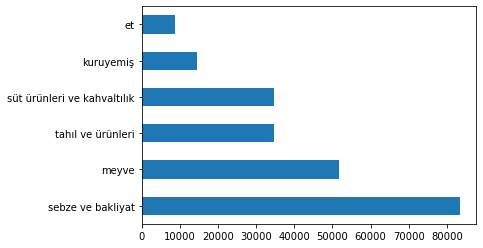

In [18]:
train_copy["ürün kategorisi"].value_counts().plot.barh();

In [19]:
train_copy["ürün"].value_counts()

kıyma            2880
salam            2880
Çilek            2880
Armut            2880
tereyağ          2880
                 ... 
Nohut            2880
Mercimek-kuru    2880
Marul            2880
Mantar           2880
ceviz            2880
Name: ürün, Length: 79, dtype: int64

In [20]:
train_copy["ürün üretim yeri"].value_counts()

Yurt içi     113760
Yurt dışı    113760
Name: ürün üretim yeri, dtype: int64

In [21]:
train_copy["market"].value_counts()

M    75840
C    75840
B    75840
Name: market, dtype: int64

In [22]:
train_copy["şehir"].value_counts()

A    28440
B    28440
C    28440
D    28440
E    28440
F    28440
G    28440
H    28440
Name: şehir, dtype: int64

## Dağılım Grafikleri & Veri görselleştirilmesi

### scatterplot

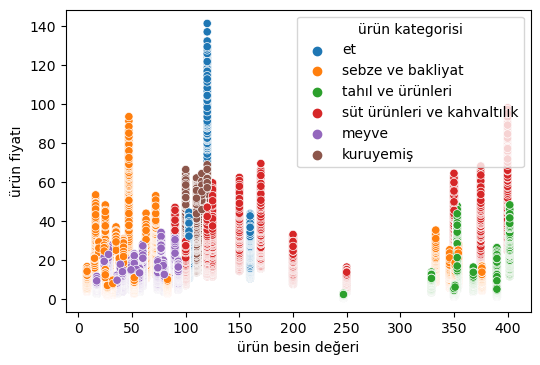

In [23]:
plt.figure(dpi=100)
sns.scatterplot(x= "ürün besin değeri", y= "ürün fiyatı", hue= "ürün kategorisi", data= train_copy);

#### et kategorisi besin degeri incelemesi

In [24]:
train_copy[train_copy["ürün kategorisi"] == "et"]["ürün besin değeri"].value_counts()

# Çok onemli!! 120 besin degerine sahip olan etin fiyatı cok yukarılara gidebiliyor.

120    2880
103    2880
160    2880
Name: ürün besin değeri, dtype: int64

In [25]:
train_copy[train_copy["ürün kategorisi"] == "et"]["ürün"].value_counts()

kıyma    2880
tavuk    2880
hindi    2880
Name: ürün, dtype: int64

In [26]:
train_copy[train_copy["ürün kategorisi"] == "et"][train_copy["ürün"]== "kıyma"]["ürün besin değeri"].value_counts() 

## Kıymanın besin değeri hep 120

120    2880
Name: ürün besin değeri, dtype: int64

In [27]:
train_copy[train_copy["ürün kategorisi"] == "et"][train_copy["ürün"]== "hindi"]["ürün besin değeri"].value_counts() 


160    2880
Name: ürün besin değeri, dtype: int64

#### süt ürünleri besin degeri incelemesi

In [28]:
train_copy[train_copy["ürün kategorisi"] == "süt ürünleri ve kahvaltılık"]["ürün besin değeri"].value_counts()


125    5760
100    2880
150    2880
170    2880
200    2880
90     2880
120    2880
250    2880
350    2880
400    2880
375    2880
Name: ürün besin değeri, dtype: int64

In [29]:
train_copy[train_copy["ürün kategorisi"] == "süt ürünleri ve kahvaltılık"]["ürün"].value_counts()

yumurta             2880
beyaz peynir        2880
Kaşar peyniri       2880
krema               2880
yoğurt              2880
sucuk               2880
salam               2880
sosis               2880
tam buğday ekmek    2880
kaymak              2880
bal                 2880
tereyağ             2880
Name: ürün, dtype: int64

In [30]:
train_copy[train_copy["ürün kategorisi"] == "süt ürünleri ve kahvaltılık"][train_copy["ürün"]== "yumurta"]["ürün besin değeri"].value_counts() 

100    2880
Name: ürün besin değeri, dtype: int64

In [31]:
train_copy.head()

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A
1,2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A
2,2016-01-01,hindi,160,et,11.12,Yurt içi,M,A
3,2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A
4,2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A


#### Kategorilerin birbirine göre ilişkisi

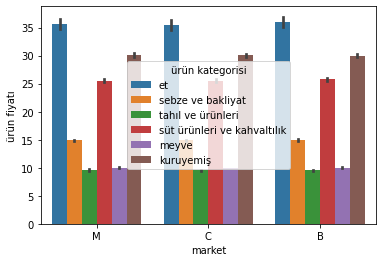

In [32]:
sns.barplot(x= "market", y= "ürün fiyatı", hue= "ürün kategorisi", data= train_copy);

## market özelinde fıyat ortalamaları

In [33]:
train_copy.groupby(["market", "ürün kategorisi"])["ürün fiyatı"].mean()

market  ürün kategorisi            
B       et                             35.995198
        kuruyemiş                      30.014744
        meyve                           9.992151
        sebze ve bakliyat              14.944694
        süt ürünleri ve kahvaltılık    25.818628
        tahıl ve ürünleri               9.535002
C       et                             35.507347
        kuruyemiş                      30.032744
        meyve                           9.958138
        sebze ve bakliyat              14.904890
        süt ürünleri ve kahvaltılık    25.539446
        tahıl ve ürünleri               9.521207
M       et                             35.666330
        kuruyemiş                      30.099960
        meyve                          10.028312
        sebze ve bakliyat              14.879722
        süt ürünleri ve kahvaltılık    25.500941
        tahıl ve ürünleri               9.552688
Name: ürün fiyatı, dtype: float64

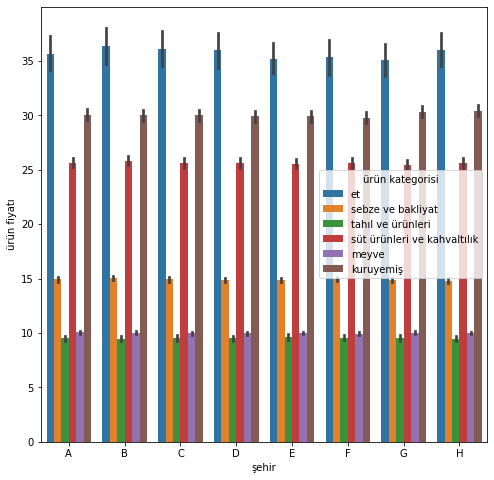

In [34]:
plt.figure(figsize=(8,8))
sns.barplot(x= "şehir", y= "ürün fiyatı", hue= "ürün kategorisi", data= train_copy);

## Şehir özelinde ürün fiyatları

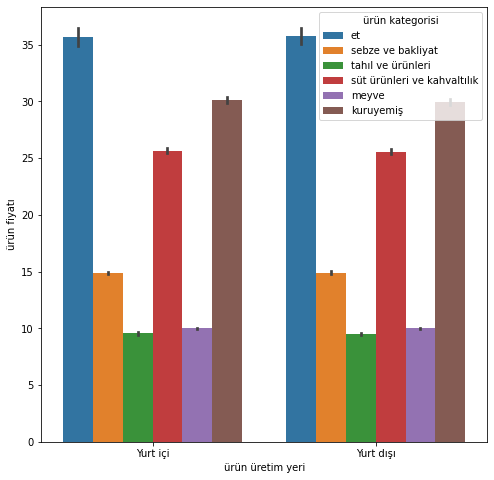

In [35]:
plt.figure(figsize=(8,8))
sns.barplot(x= "ürün üretim yeri", y= "ürün fiyatı", hue= "ürün kategorisi", data= train_copy);

## üretim yeri özelinde ürün fiyatları

In [36]:
train_copy.groupby(["ürün üretim yeri", "ürün kategorisi"])["ürün fiyatı"].std()

#ortalama dogrulamasi yapildi

ürün üretim yeri  ürün kategorisi            
Yurt dışı         et                             25.424891
                  kuruyemiş                      11.372274
                  meyve                           4.838450
                  sebze ve bakliyat              10.353037
                  süt ürünleri ve kahvaltılık    14.202032
                  tahıl ve ürünleri               8.280900
Yurt içi          et                             25.582553
                  kuruyemiş                      11.499822
                  meyve                           4.866383
                  sebze ve bakliyat              10.446702
                  süt ürünleri ve kahvaltılık    14.393761
                  tahıl ve ürünleri               8.391178
Name: ürün fiyatı, dtype: float64

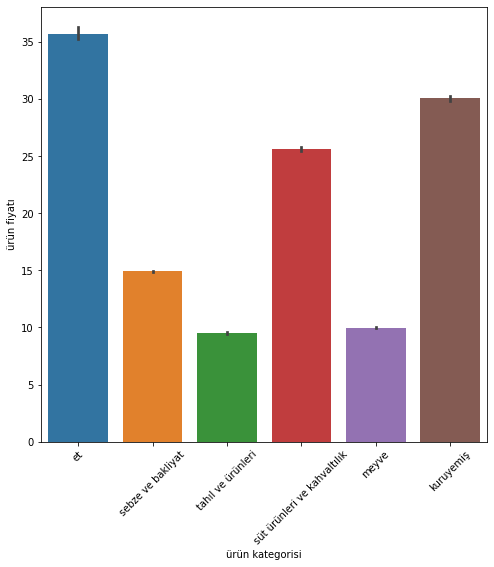

In [37]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=45)
sns.barplot(x= "ürün kategorisi", y= "ürün fiyatı", data= train_copy);

## ürün kategorisi özelinde ürün fiyatları

#### Fiyat artislarinin incelenmesi

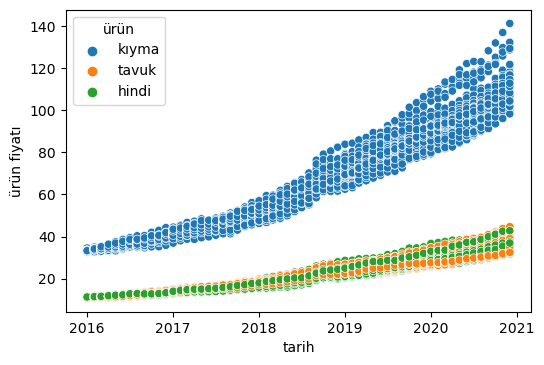

In [38]:
## Et ütünlerinin fiyat artisi
renk = train_copy[train_copy["ürün kategorisi"]== "et"]["ürün"]
plt.figure(dpi=100)
sns.scatterplot(x= "tarih", y= "ürün fiyatı", hue= renk, data= train_copy[train_copy["ürün kategorisi"]== "et"]);

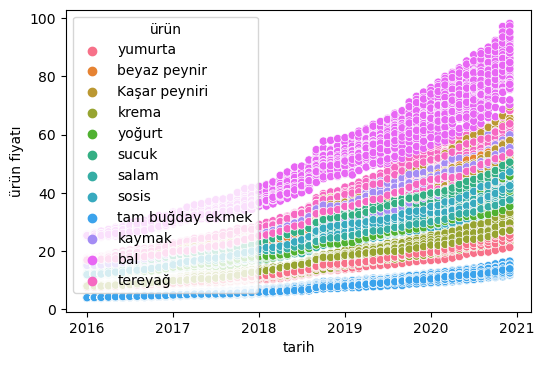

In [39]:
## Sut ürünlerinin fiyat artısı
renk = train_copy[train_copy["ürün kategorisi"]== "süt ürünleri ve kahvaltılık"]["ürün"]
plt.figure(dpi=100)
sns.scatterplot(x= "tarih", y= "ürün fiyatı", hue= renk, data= train_copy[train_copy["ürün kategorisi"]== "süt ürünleri ve kahvaltılık"]);

In [40]:
## Not= Dolar kurunun etki ettiği çok açık şekilde görülüyor. dolar kuru da eklenebilir.

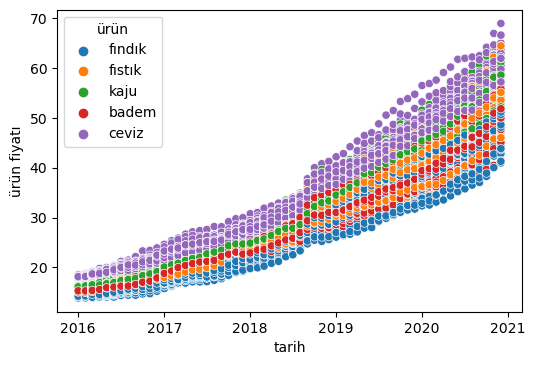

In [41]:
renk = train_copy[train_copy["ürün kategorisi"]== "kuruyemiş"]["ürün"]
plt.figure(dpi=100)
sns.scatterplot(x= "tarih", y= "ürün fiyatı", hue= renk, data= train_copy[train_copy["ürün kategorisi"]== "kuruyemiş"]);

#### ürünlerin ne kadarı yurt dışından geliyor

In [42]:
train_copy["ürün üretim yeri"].value_counts()

Yurt içi     113760
Yurt dışı    113760
Name: ürün üretim yeri, dtype: int64

In [43]:
train_copy.head()

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A
1,2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A
2,2016-01-01,hindi,160,et,11.12,Yurt içi,M,A
3,2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A
4,2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A


#### Hangi market ne kadar yurt İçi/dısı urun satıyor

In [44]:
train_copy.groupby("market")["ürün üretim yeri"].value_counts()

market  ürün üretim yeri
B       Yurt dışı           37920
        Yurt içi            37920
C       Yurt dışı           37920
        Yurt içi            37920
M       Yurt dışı           37920
        Yurt içi            37920
Name: ürün üretim yeri, dtype: int64

## Doviz kuru eklenmesi

In [45]:
train_copy = train_copy.set_index("tarih")
train_copy.head()

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
tarih,,,,,,,
2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A
2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A
2016-01-01,hindi,160,et,11.12,Yurt içi,M,A
2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A
2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A


In [46]:
testkopya = testkopya.set_index("tarih")

In [47]:
testkopya.head()

,id,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir
tarih,,,,,,,
2021-01-01,0,kıyma,120,et,Yurt içi,M,A
2021-01-01,1,tavuk,103,et,Yurt içi,M,A
2021-01-01,2,hindi,160,et,Yurt içi,M,A
2021-01-01,3,Bakla-kuru,354,sebze ve bakliyat,Yurt içi,M,A
2021-01-01,4,Bakla-taze,72,sebze ve bakliyat,Yurt içi,M,A


In [48]:
tamDF = pd.concat([train_copy, testkopya])

In [49]:
tamDF.head()

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,id
tarih,,,,,,,,
2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A,NaN
2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A,NaN
2016-01-01,hindi,160,et,11.12,Yurt içi,M,A,NaN
2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A,NaN
2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A,NaN


In [50]:
tamDF.tail()

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,id
tarih,,,,,,,,
2021-12-01,fındık,110,kuruyemiş,NaN,Yurt dışı,B,H,45499.0
2021-12-01,fıstık,115,kuruyemiş,NaN,Yurt dışı,B,H,45500.0
2021-12-01,kaju,100,kuruyemiş,NaN,Yurt dışı,B,H,45501.0
2021-12-01,badem,110,kuruyemiş,NaN,Yurt dışı,B,H,45502.0
2021-12-01,ceviz,120,kuruyemiş,NaN,Yurt dışı,B,H,45503.0


In [51]:
trainUSD = pd.read_csv("~/Desktop/DataThon_Yarisma/trainUSD.csv", parse_dates=['Date'])
testUSD = pd.read_csv("~/Desktop/DataThon_Yarisma/testUSD.csv", parse_dates=['Date'])
trainUSD.head()

,Date,Price,Open,High,Low,Change %
0,2016-01-01,2.9139,2.9177,2.9201,2.9129,-0.13%
1,2016-01-04,2.9642,2.9185,2.9810,2.9137,1.73%
2,2016-01-05,2.9852,2.9642,2.9918,2.9538,0.71%
3,2016-01-06,3.0024,2.9849,3.0160,2.9820,0.58%
4,2016-01-07,2.9993,3.0007,3.0290,2.9850,-0.10%


In [52]:
testUSD.head()

,Date,Price,Open,High,Low,Change %
0,2021-01-01,7.4392,7.4392,7.4392,7.4392,0.10%
1,2021-01-04,7.4198,7.4403,7.4470,7.3393,-0.26%
2,2021-01-05,7.3856,7.4263,7.4382,7.3591,-0.46%
3,2021-01-06,7.3047,7.3893,7.3973,7.2663,-1.10%
4,2021-01-07,7.3149,7.3067,7.3955,7.2372,0.14%


In [53]:
trainUSD = trainUSD.set_index("Date")
testUSD = testUSD.set_index("Date")

In [54]:
tamUSD = pd.concat([trainUSD, testUSD])

In [55]:
tamUSD.head()

,Price,Open,High,Low,Change %
Date,,,,,
2016-01-01,2.9139,2.9177,2.9201,2.9129,-0.13%
2016-01-04,2.9642,2.9185,2.9810,2.9137,1.73%
2016-01-05,2.9852,2.9642,2.9918,2.9538,0.71%
2016-01-06,3.0024,2.9849,3.0160,2.9820,0.58%
2016-01-07,2.9993,3.0007,3.0290,2.9850,-0.10%


In [56]:
DF = tamDF.join(tamUSD)

In [57]:
DF.head()

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,id,Price,Open,High,Low,Change %
2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A,NaN,2.9139,2.9177,2.9201,2.9129,-0.13%
2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A,NaN,2.9139,2.9177,2.9201,2.9129,-0.13%
2016-01-01,hindi,160,et,11.12,Yurt içi,M,A,NaN,2.9139,2.9177,2.9201,2.9129,-0.13%
2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A,NaN,2.9139,2.9177,2.9201,2.9129,-0.13%
2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A,NaN,2.9139,2.9177,2.9201,2.9129,-0.13%


In [58]:
DF.tail()

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,id,Price,Open,High,Low,Change %
2021-12-01,fındık,110,kuruyemiş,NaN,Yurt dışı,B,H,45499.0,13.2635,13.4856,13.8983,12.3977,-1.56%
2021-12-01,fıstık,115,kuruyemiş,NaN,Yurt dışı,B,H,45500.0,13.2635,13.4856,13.8983,12.3977,-1.56%
2021-12-01,kaju,100,kuruyemiş,NaN,Yurt dışı,B,H,45501.0,13.2635,13.4856,13.8983,12.3977,-1.56%
2021-12-01,badem,110,kuruyemiş,NaN,Yurt dışı,B,H,45502.0,13.2635,13.4856,13.8983,12.3977,-1.56%
2021-12-01,ceviz,120,kuruyemiş,NaN,Yurt dışı,B,H,45503.0,13.2635,13.4856,13.8983,12.3977,-1.56%


In [59]:
DF.Price.isna().sum()

72048

In [60]:
NaN_price_list = DF[DF['Price'].isna()].index.unique()
NaN_price_list

DatetimeIndex(['2016-05-01', '2016-10-01', '2017-01-01', '2017-04-01',
               '2017-07-01', '2017-10-01', '2018-04-01', '2018-07-01',
               '2018-09-01', '2018-12-01', '2019-06-01', '2019-09-01',
               '2019-12-01', '2020-02-01', '2020-03-01', '2020-08-01',
               '2020-11-01', '2021-05-01', '2021-08-01'],
              dtype='datetime64[ns]', freq=None)

In [61]:
for weekend in NaN_price_list:
    DF.loc[weekend, "Price"] = tamUSD.loc[weekend - timedelta(2), "Price"]

In [62]:
DF.loc[NaN_price_list[17], "Price"]

2021-05-01    8.2105
2021-05-01    8.2105
2021-05-01    8.2105
2021-05-01    8.2105
2021-05-01    8.2105
               ...  
2021-05-01    8.2105
2021-05-01    8.2105
2021-05-01    8.2105
2021-05-01    8.2105
2021-05-01    8.2105
Name: Price, Length: 3792, dtype: float64

In [63]:
DF["Price"].isnull().sum()

0

## Enflasyonun eklenmesi

In [64]:
inflation = pd.read_csv("~/Desktop/DataThon_Yarisma/inflationReis.csv", delimiter=";")
inflation.head(100)

,tarih,yillik tufe,aylık tufe
0,1.01.2016,9.58,1.82
1,1.02.2016,8.78,-0.02
2,1.03.2016,7.46,-0.04
3,1.04.2016,6.57,0.78
4,1.05.2016,6.58,0.58
...,...,...,...
67,1.08.2021,19.25,1.12
68,1.09.2021,19.58,1.25
69,1.10.2021,19.89,2.39
70,1.11.2021,21.31,3.51


## inflation['tarih']= pd.to_datetime(inflation['tarih'])

In [66]:
inflation.tarih

0    2016-01-01
1    2016-01-02
2    2016-01-03
3    2016-01-04
4    2016-01-05
        ...    
67   2021-01-08
68   2021-01-09
69   2021-01-10
70   2021-01-11
71   2021-01-12
Name: tarih, Length: 72, dtype: datetime64[ns]

In [67]:
inflation = inflation.set_index("tarih")

In [68]:
inflation

,yillik tufe,aylık tufe
tarih,,
2016-01-01,9.58,1.82
2016-01-02,8.78,-0.02
2016-01-03,7.46,-0.04
2016-01-04,6.57,0.78
2016-01-05,6.58,0.58
...,...,...
2021-01-08,19.25,1.12
2021-01-09,19.58,1.25
2021-01-10,19.89,2.39


In [69]:
DF = DF.join(inflation)
DF.head()

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,id,Price,Open,High,Low,Change %,yillik tufe,aylık tufe
2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A,NaN,2.9139,2.9177,2.9201,2.9129,-0.13%,9.58,1.82
2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A,NaN,2.9139,2.9177,2.9201,2.9129,-0.13%,9.58,1.82
2016-01-01,hindi,160,et,11.12,Yurt içi,M,A,NaN,2.9139,2.9177,2.9201,2.9129,-0.13%,9.58,1.82
2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A,NaN,2.9139,2.9177,2.9201,2.9129,-0.13%,9.58,1.82
2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A,NaN,2.9139,2.9177,2.9201,2.9129,-0.13%,9.58,1.82


In [70]:
DF[DF["ürün"]=="tavuk"]["ürün fiyatı"].values

array([11.22, 11.1 , 11.18, ...,   nan,   nan,   nan])

<AxesSubplot:>

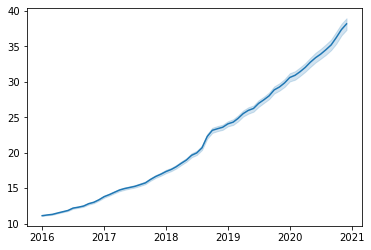

In [71]:
sns.lineplot(DF[DF["ürün"]=="tavuk"]["ürün fiyatı"].index, DF[DF["ürün"]=="tavuk"]["ürün fiyatı"].values)

In [72]:
DF.drop(["Open", "High", "Low", "Change %"], axis=1, inplace=True)

In [73]:
DF[DF["ürün"]=="tavuk"]

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,id,Price,yillik tufe,aylık tufe
2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A,NaN,2.9139,9.58,1.82
2016-01-01,tavuk,103,et,11.10,Yurt dışı,M,A,NaN,2.9139,9.58,1.82
2016-01-01,tavuk,103,et,11.18,Yurt içi,C,A,NaN,2.9139,9.58,1.82
2016-01-01,tavuk,103,et,11.25,Yurt dışı,C,A,NaN,2.9139,9.58,1.82
2016-01-01,tavuk,103,et,11.23,Yurt içi,B,A,NaN,2.9139,9.58,1.82
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,tavuk,103,et,NaN,Yurt dışı,M,H,45110.0,13.2635,NaN,NaN
2021-12-01,tavuk,103,et,NaN,Yurt içi,C,H,45189.0,13.2635,NaN,NaN
2021-12-01,tavuk,103,et,NaN,Yurt dışı,C,H,45268.0,13.2635,NaN,NaN
2021-12-01,tavuk,103,et,NaN,Yurt içi,B,H,45347.0,13.2635,NaN,NaN


In [74]:
DF.to_csv("YarismaVerisi.csv")